In [1]:
%load_ext autoreload
%autoreload 2

import RS_utils
import RS_dataset
import RS_models

import numpy as np 
from glob import glob
import os
import torch
import matplotlib.pyplot as plt 
from torch.utils.data import DataLoader

In [2]:
#-- data
img_path = "/mnt/hdd/eric/.tmp_ipy/15.Lab_Detection/01.Models/04.SAM_fine/0.data/01.512_imgs"
mask_path = "/mnt/hdd/eric/.tmp_ipy/15.Lab_Detection/01.Models/04.SAM_fine/0.data/02.512_masks"

img_path_ship  = np.array(sorted(glob(os.path.join(img_path, "*.png"))) )
mask_path_ship = np.array(sorted(glob(os.path.join(mask_path, "*.png"))) )

aa = np.load("/mnt/hdd/eric/.tmp_ipy/15.Lab_Detection/05.Training/Segmentation/03.data_list/512_ships.npy")

selected_paths_img = img_path_ship[aa]
selected_paths_mask  = mask_path_ship[aa]

In [3]:
#-- args
EXEC_VER = 24 
BATCH_SIZE = 4
DEVICE = "cuda:0"
DEVICES = [0,1,2,3]
RESUME = False
SAVE_EPOCH = 20

In [4]:
#-- category 
ISAID_CLASSES_SHIP = (
    'background','ship','harbor' 
    )
ISAID_PALETTE_SHIP = {
    0: (0, 0, 0), 
    1: (0, 0, 63), 
    2: (0, 100, 155)}


train_dataset = RS_dataset.Seg_RS_dataset_edge(img_dir=selected_paths_img, mask_dir=selected_paths_mask, image_resize = None, phase="train",palette=ISAID_PALETTE_SHIP )
dataloader  = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, collate_fn=train_dataset.collate_fn)

In [5]:
label, label_edge  = train_dataset.__getitem__(15)

In [6]:
label.shape

torch.Size([3, 256, 256])

In [7]:
label_edge.shape

torch.Size([1, 256, 256])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


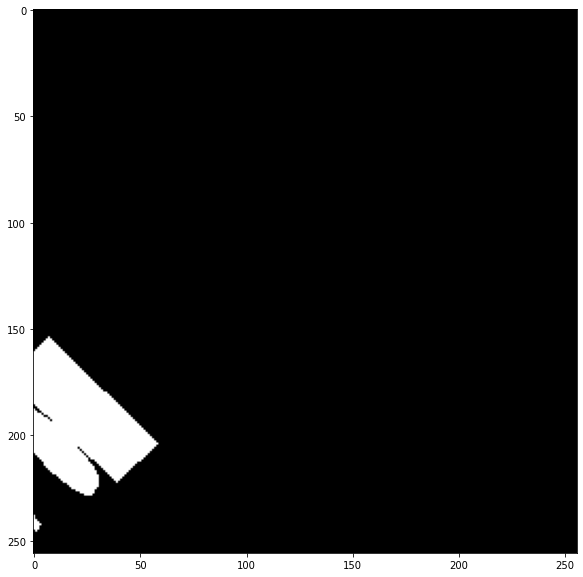

In [8]:
RS_utils.torch_display(label)

In [9]:
# RS_utils.torch_display(label_edge)

In [10]:
# import torch.nn as nn 
# criterion = nn.CrossEntropyLoss(reduction="mean") 

In [11]:
# model = RS_models.Edge_Net()
# out_ = model(label)

In [12]:
# label_edge.shape

In [13]:
#---
import torch.nn as nn 

model = RS_models.Edge_Net()
model = model.to(DEVICE)
criterion = nn.CrossEntropyLoss(reduction="mean") 
optimizer = torch.optim.AdamW(model.parameters(), lr=1e-5)
#---

epochs = 999
for epoch in range(epochs):
    
    iteration = 0
    epoch_running_loss = 0 
    
    #tqdm_iterator = tqdm(data_loader["train"], desc=f"Epoch {epoch}")
    
    for index, data in enumerate(dataloader):
        
        masks, masks_edge = data
    
        #---
        masks, masks_edge = masks.to(DEVICE), masks_edge.float().to(DEVICE)
        
        
        # opt
        optimizer.zero_grad()
        
        # runs
        outputs = model(masks)
        
        # criterion
        outputs = outputs.squeeze(1)
        masks_edge = masks_edge.squeeze(1)

        # loss
        loss = criterion(outputs, masks_edge)
        loss.backward()
        #fabric.backward(loss)
        optimizer.step()
        
        # stat
        epoch_running_loss += loss.item()

        # log
        #logger.info(f"epoch : {epoch} iter : {index} loss: {loss:.5f} dice: {dice_score:.5f}" )
        log = {'loss': f'{loss / 10:.5f}' }
        print(log)
        #wandb.log(log)

        log_iter = 100
        
        if (index % log_iter) == 0:    # print every 2000 mini-batches
            print(f"epoch : {epoch} , iter : {index} , total_iter : {len(dataloader)} , running_loss : {epoch_running_loss / (index +1)}")
        
    
    #-- save 
    
    if epoch % SAVE_EPOCH ==0:
        #-- save 
        save_path = f"./02.ckpts/ver_{EXEC_VER}_epoch_{epoch + 1}.pt"
        torch.save(model.state_dict(), save_path)

{'loss': '7.06075'}
epoch : 0 , iter : 0 , total_iter : 388 , running_loss : 70.60745239257812
{'loss': '10.07847'}
{'loss': '11.75120'}
{'loss': '4.89421'}
{'loss': '7.63805'}
{'loss': '2.94300'}
{'loss': '5.73885'}
{'loss': '8.13475'}
{'loss': '1.45014'}
{'loss': '11.23062'}
{'loss': '12.41443'}
{'loss': '1.52892'}
{'loss': '17.00753'}
{'loss': '10.05324'}
{'loss': '1.54167'}
{'loss': '7.22813'}
{'loss': '5.40396'}
{'loss': '18.16755'}
{'loss': '8.64950'}
{'loss': '8.08546'}
{'loss': '5.83752'}
{'loss': '9.69416'}
{'loss': '3.60725'}
{'loss': '1.54899'}
{'loss': '7.62564'}
{'loss': '1.53827'}
{'loss': '3.26695'}
{'loss': '1.90436'}
{'loss': '9.36585'}
{'loss': '8.11561'}
{'loss': '9.77168'}
{'loss': '4.11813'}
{'loss': '4.97534'}
{'loss': '0.87767'}
{'loss': '4.75795'}
{'loss': '4.41746'}
{'loss': '4.33792'}
{'loss': '11.14143'}
{'loss': '4.44377'}
{'loss': '15.69509'}
{'loss': '2.51833'}
{'loss': '6.14834'}
{'loss': '10.19748'}
{'loss': '5.56008'}
{'loss': '8.71183'}
{'loss': '11.17

KeyboardInterrupt: 

: 